### Medical Insurance Charges Analysis

The purpose of this project is to analyze a medical insurance dataset and develop predictive models for insurance charges. The dataset contains records of individuals with features such as age, gender, BMI, number of children, smoker status, and region in the USA, along with their insurance charges in USD.

The goal of this project is to:
- Perform data cleaning to handle missing or inconsistent values.
- Conduct exploratory data analysis (EDA) to understand patterns and identify which features most influence insurance charges.
- Develop regression models (Single Variable, Multiple Linear, Ridge) to predict charges accurately.
- Refine the models using regularization and polynomial features for better performance.

By the end of this project, we aim to provide insights into the key factors driving insurance costs and demonstrate how data-driven modeling can predict charges effectively.

##### Importing Required Libraries

In [6]:
# Basic Data Handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models & Evaluation
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split


##### Download the dataset

In [ ]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv"
response = requests.get(url)

with open("insurance.csv", "wb") as f:
    f.write(response.content)

df = pd.read_csv("insurance.csv")

In [12]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
print(df.head())

  age  gender     bmi  no_of_children smoker  region      charges
0  18       2  33.770               1      0       4   1725.55230
1  28       2  33.000               3      0       4   4449.46200
2  33       2  22.705               0      0       1  21984.47061
3  32       2  28.880               0      0       1   3866.85520
4  31       1  25.740               0      ?       4   3756.62160


In [13]:
df.replace('?', np.nan, inplace = True)

##### Data Wrangling

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


Handle Missing Values

In [16]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB
None


C:\Users\a12u\AppData\Local\Temp\ipykernel_26580\863333469.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoker"].replace(np.nan, is_smoker, inplace=True)


In [17]:
# round the charges to 2 decimal places
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   18       2  33.770               1       0       4   1725.55
1   28       2  33.000               3       0       4   4449.46
2   33       2  22.705               0       0       1  21984.47
3   32       2  28.880               0       0       1   3866.86
4   31       1  25.740               0       0       4   3756.62


##### Exploratory Data Analysis (EDA)

Check Basic Statistics

In [19]:
# Summary statistics for numeric columns
print(df.describe())

               age       gender          bmi  no_of_children       smoker  \
count  2771.000000  2771.000000  2771.000000     2771.000000  2771.000000   
mean     39.116925     1.507398    30.702360        1.102129     0.203176   
std      14.078815     0.500036     6.130324        1.214845     0.402435   
min      18.000000     1.000000    15.960000        0.000000     0.000000   
25%      26.000000     1.000000    26.220000        0.000000     0.000000   
50%      39.000000     2.000000    30.495000        1.000000     0.000000   
75%      51.000000     2.000000    34.770000        2.000000     0.000000   
max      64.000000     2.000000    53.130000        5.000000     1.000000   

            region       charges  
count  2771.000000   2771.000000  
mean      2.559726  13260.062288  
std       1.130934  12153.767157  
min       1.000000   1121.870000  
25%       2.000000   4687.800000  
50%       3.000000   9304.700000  
75%       4.000000  16516.745000  
max       4.000000  63770.

In [20]:
# For categorical columns
print(df['gender'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

gender
2    1406
1    1365
Name: count, dtype: int64
smoker
0    2208
1     563
Name: count, dtype: int64
region
4    766
3    683
1    664
2    658
Name: count, dtype: int64


Visualize Distributions

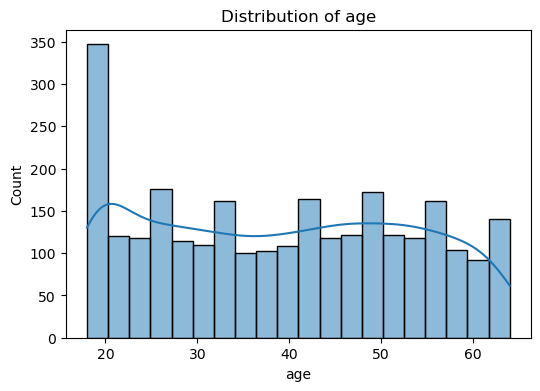

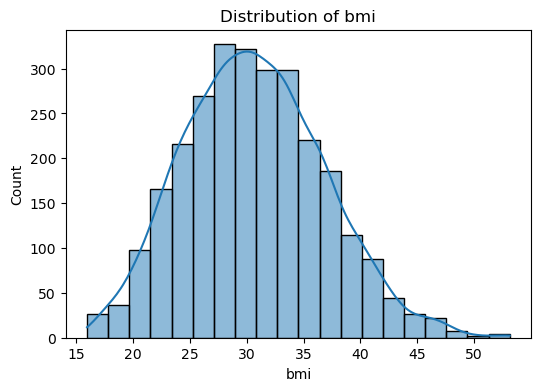

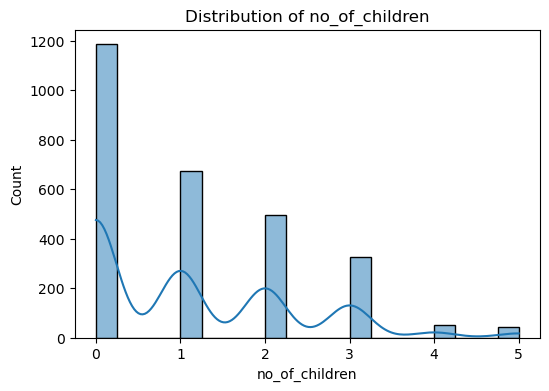

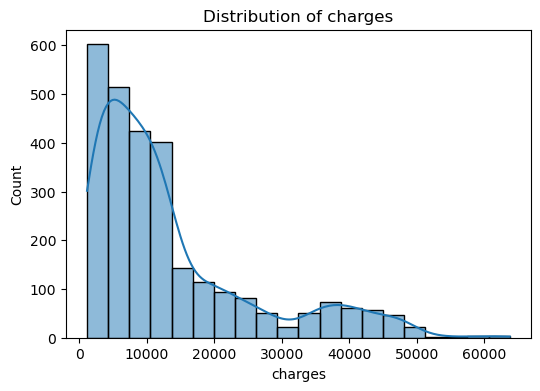

In [22]:
# Histograms (continuous variables)
numeric_cols = ['age', 'bmi', 'no_of_children', 'charges']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()


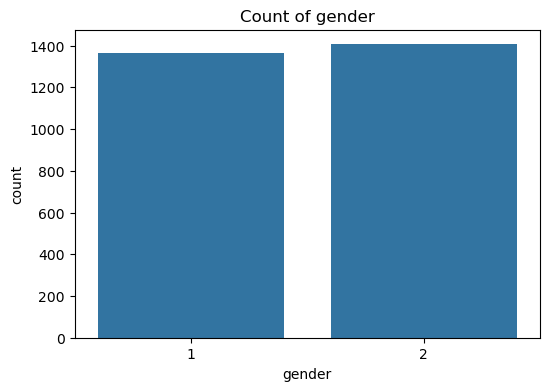

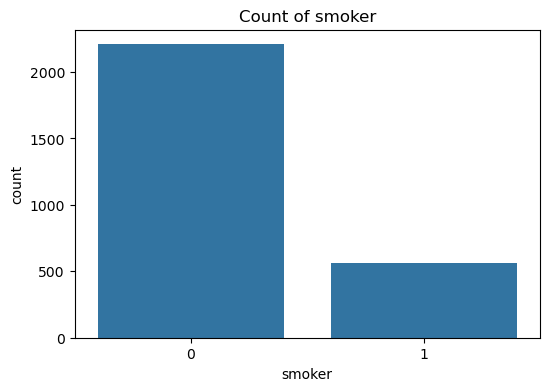

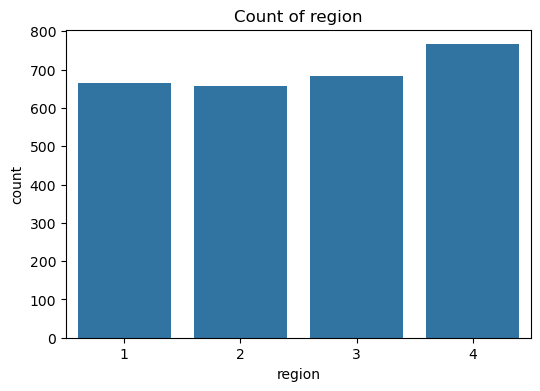

In [ ]:
# Count plots (categorical variables)

categorical_cols = ['gender', 'smoker', 'region']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()

Check Relationships Between Features and Charges

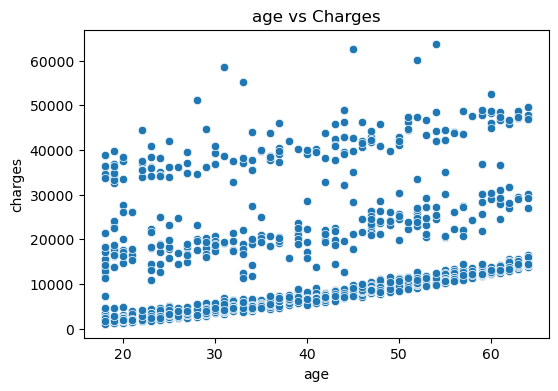

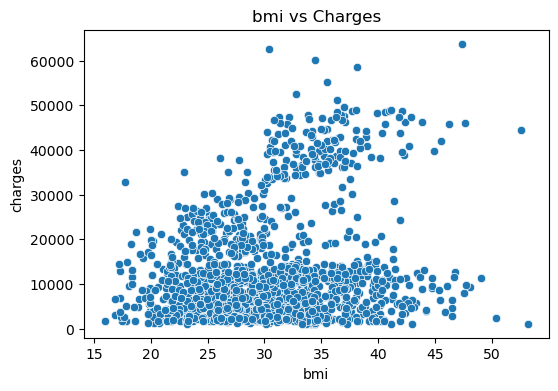

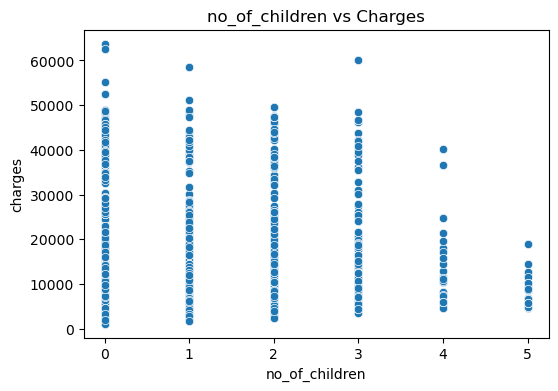

In [24]:
#Scatter plots for numeric predictors

for col in ['age', 'bmi', 'no_of_children']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['charges'])
    plt.title(f'{col} vs Charges')
    plt.show()

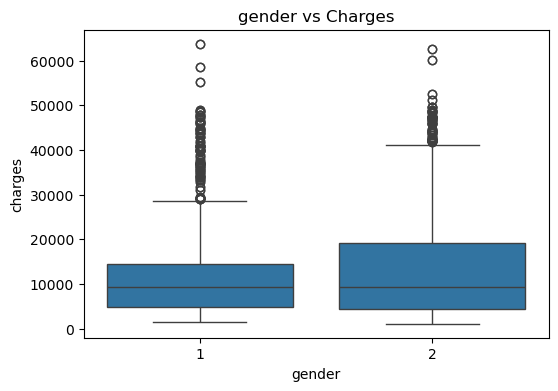

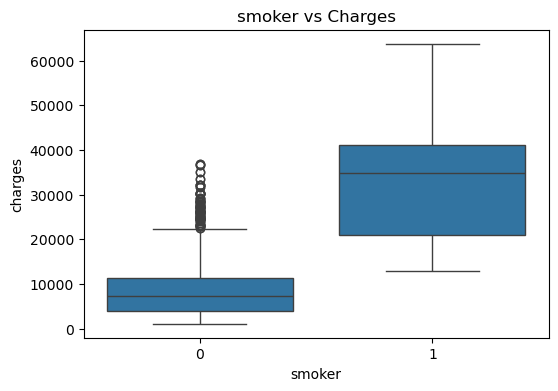

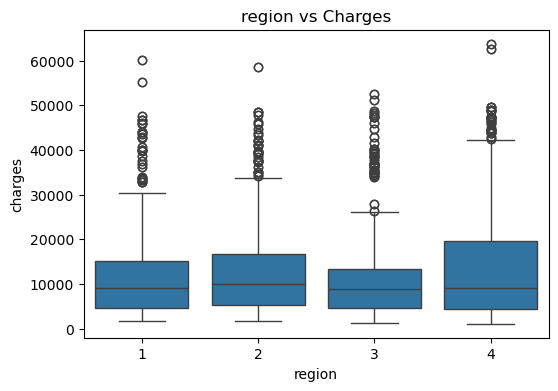

In [25]:
#Box plots for categorical predictors

for col in ['gender', 'smoker', 'region']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], y=df['charges'])
    plt.title(f'{col} vs Charges')
    plt.show()


Correlation Analysis

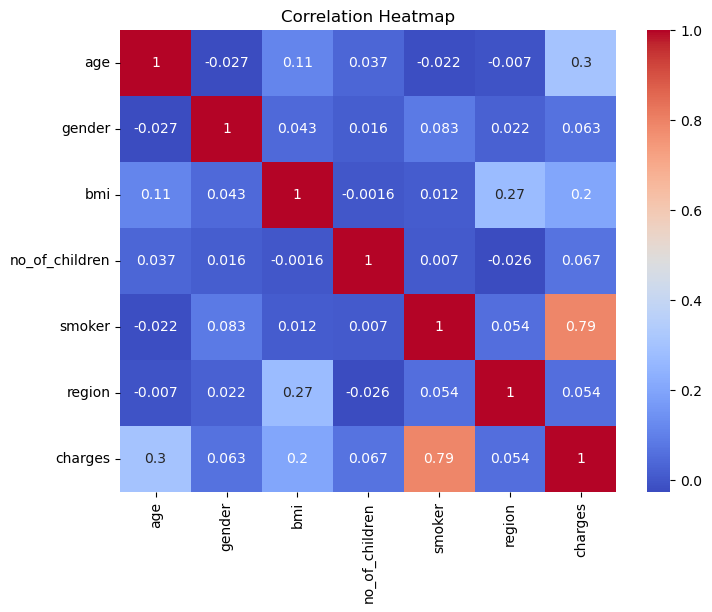

In [26]:
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### Model Development

In [28]:
# Target variable
y = df['charges']

# Feature variables (all predictors)
X = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]

In [30]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Single Variable Linear Regression

In [31]:
# Use BMI as single predictor
X_bmi_train = X_train[['bmi']]
X_bmi_test = X_test[['bmi']]

# Fit the model
lr_single = LinearRegression()
lr_single.fit(X_bmi_train, y_train)

# Predict
y_pred_single = lr_single.predict(X_bmi_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred_single)
r2 = r2_score(y_test, y_pred_single)

print(f"Single Variable Linear Regression (BMI): MSE={mse:.2f}, R2={r2:.2f}")

Single Variable Linear Regression (BMI): MSE=153463793.45, R2=0.06


Multiple Linear Regression

In [32]:
# Fit the model
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

# Predict
y_pred_multi = lr_multi.predict(X_test)

# Evaluate
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"Multiple Linear Regression: MSE={mse_multi:.2f}, R2={r2_multi:.2f}")

Multiple Linear Regression: MSE=36317199.50, R2=0.78


Ridge Regression

In [ ]:
# Fit the model
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge.predict(X_test)

# Evaluate
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression: MSE={mse_ridge:.2f}, R2={r2_ridge:.2f}")

Ridge Regression: MSE=36358983.78, R2=0.78


Compare Models

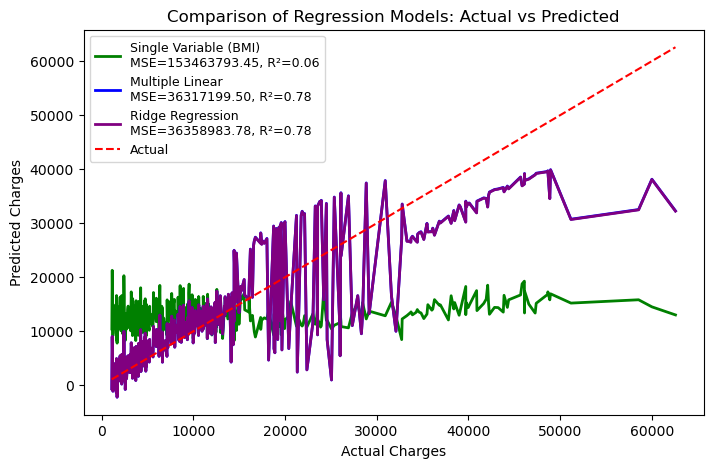

In [45]:
plt.figure(figsize=(8,5))

# Sort by actual charges
sorted_idx = y_test.argsort()
y_test_sorted = y_test.iloc[sorted_idx]

# Plot predictions
plt.plot(y_test_sorted, y_pred_single[sorted_idx], color='green', linewidth=2, label=f'Single Variable (BMI)\nMSE={mse:.2f}, R²={r2:.2f}')
plt.plot(y_test_sorted, y_pred_multi[sorted_idx], color='blue', linewidth=2, label=f'Multiple Linear\nMSE={mse_multi:.2f}, R²={r2_multi:.2f}')
plt.plot(y_test_sorted, y_pred_ridge[sorted_idx], color='purple', linewidth=2, label=f'Ridge Regression\nMSE={mse_ridge:.2f}, R²={r2_ridge:.2f}')

# Perfect prediction line
plt.plot(y_test_sorted, y_test_sorted, color='red', linestyle='--', label='Actual')

# Labels and title
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Comparison of Regression Models: Actual vs Predicted")
plt.legend(loc='upper left', fontsize=9)
plt.show()


##### Model Refinement

Ridge Regression Hyperparameter Tuning

In [ ]:
alphas = [0.01, 0.1, 1, 10, 100]
results = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((a, mse, r2))
    print(f"Alpha={a}: MSE={mse:.2f}, R²={r2:.2f}")

Alpha=0.01: MSE=36317611.26, R²=0.78
Alpha=0.1: MSE=36321322.63, R²=0.78
Alpha=1: MSE=36358983.78, R²=0.78
Alpha=10: MSE=36787084.57, R²=0.77
Alpha=100: MSE=43993748.35, R²=0.73


Polynomial Features

In [47]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the model
ridge_poly = Ridge(alpha=1.0)
ridge_poly.fit(X_train_poly, y_train)
y_pred_poly = ridge_poly.predict(X_test_poly)

# Evaluate
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Ridge Regression (degree 2): MSE={mse_poly:.2f}, R²={r2_poly:.2f}")

Polynomial Ridge Regression (degree 2): MSE=24841351.48, R²=0.85


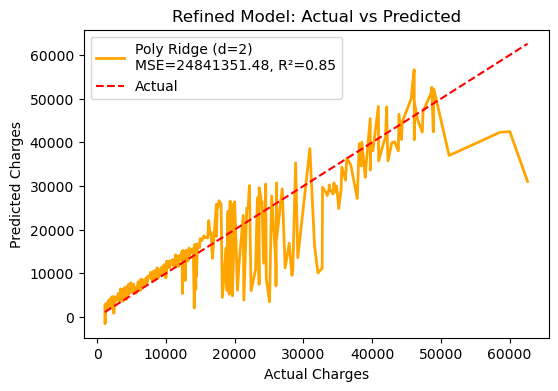

In [ ]:
plt.figure(figsize=(6,4))
sorted_idx = y_test.argsort()
plt.plot(y_test.iloc[sorted_idx], y_pred_poly[sorted_idx], color='orange', linewidth=2, label=f'Poly Ridge (d=2)\nMSE={mse_poly:.2f}, R²={r2_poly:.2f}')
plt.plot(y_test.iloc[sorted_idx], y_test.iloc[sorted_idx], color='red', linestyle='--', label='Actual')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Refined Model: Actual vs Predicted")
plt.legend()
plt.show()

#### Conclusion 

1. Smoker status is the most influential factor on insurance charges.

2. BMI and age also contribute to higher costs.

3. Multiple Linear Regression and Ridge Regression gave the best predictions, while Single Variable (BMI) alone underfits.

4. Model refinement with Ridge tuning and polynomial features slightly improved predictions.

5. This analysis can help insurance companies estimate charges accurately and understand cost-driving factors.

AUTHOR | VISURA RODRIGO